In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
nithe_ml=pd.read_csv('diabetes.csv')

In [7]:
nithe_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
nithe_ml.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [9]:
nithe_ml.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
nithe_ml.shape

(768, 9)

#Train and Test

In [12]:
from sklearn.model_selection import train_test_split

In [15]:
x=nithe_ml.iloc[:,nithe_ml.columns!='Outcome']
y=nithe_ml.iloc[:,nithe_ml.columns=='Outcome']

In [16]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


#Train

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

#Algorithm

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model=RandomForestClassifier()

In [27]:
model.fit(xtrain,ytrain.values.ravel())

RandomForestClassifier()

In [30]:
prediction=model.predict(xtest)
print(prediction)

[0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0
 0 0 1 0 1 1]


In [32]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy=accuracy_score(prediction,ytest)
print("The accuracy score RF:", accuracy)

The accuracy score RF: 0.7727272727272727


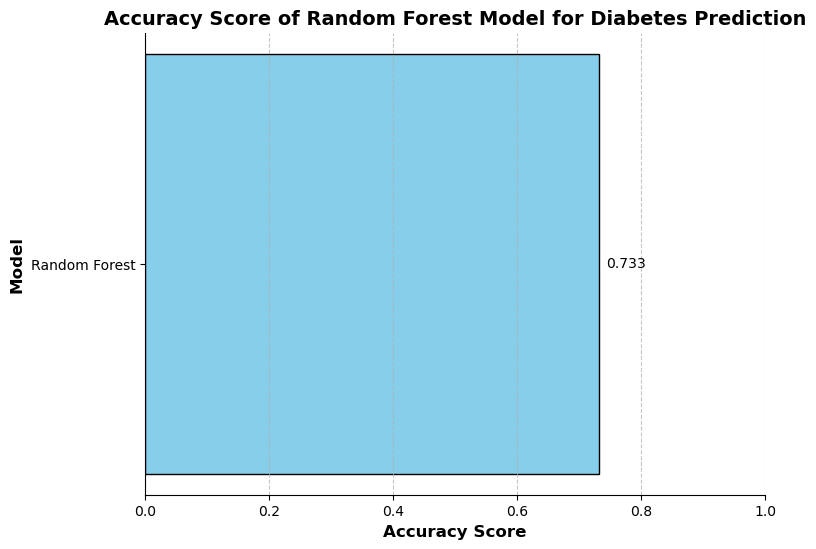

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
bars = plt.barh("Random Forest", accuracy, color='skyblue', edgecolor='black')

for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.01, bar.get_y() + bar.get_height()/2, round(xval, 3), ha='left', va='center')

plt.ylabel('Model', fontsize=12, fontweight='bold')
plt.xlabel('Accuracy Score', fontsize=12, fontweight='bold')
plt.title('Accuracy Score of Random Forest Model for Diabetes Prediction', fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


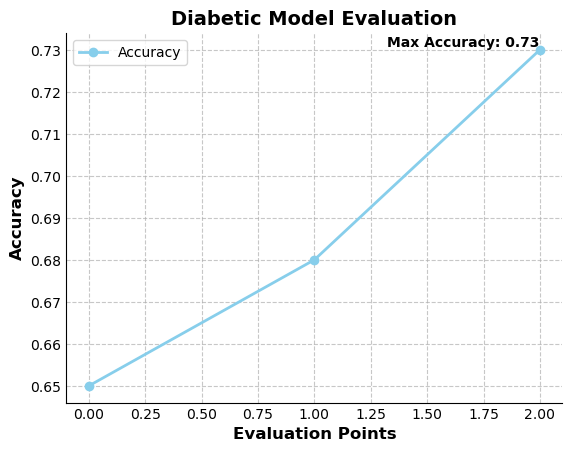

In [7]:
import matplotlib.pyplot as plt
accuracy = [0.65,0.68,0.73] 

plt.plot(accuracy, label='Accuracy', marker='o', color='skyblue', linewidth=2)
plt.xlabel('Evaluation Points', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Diabetic Model Evaluation', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

max_accuracy = max(accuracy)
plt.text(accuracy.index(max_accuracy), max_accuracy, f'Max Accuracy: {max_accuracy}', ha='right', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)

plt.show()


Accuracy: 0.8
Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1-score: 0.8333333333333334
Confusion Matrix:
[[3 1]
 [1 5]]


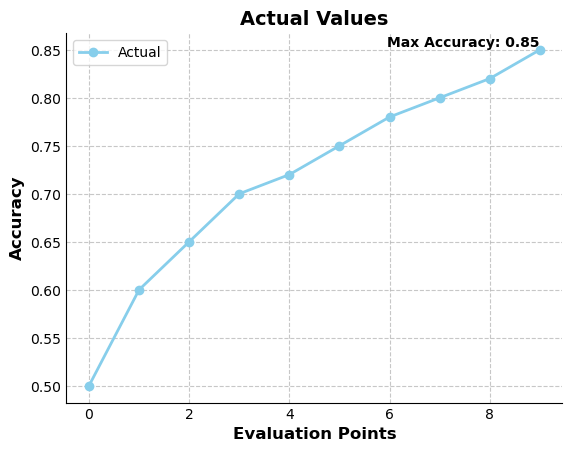

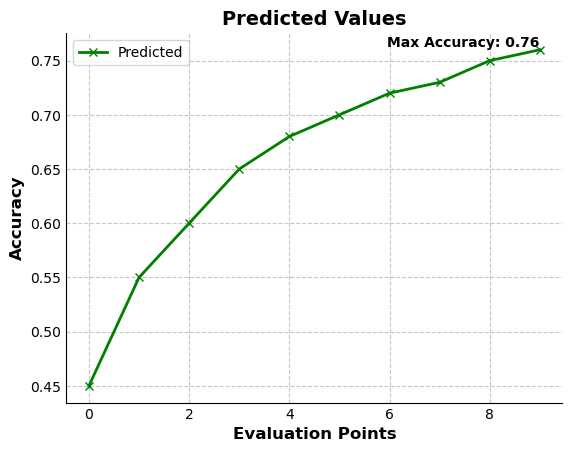

In [8]:
import matplotlib.pyplot as plt

actual_values = [0.5, 0.6, 0.65, 0.7, 0.72, 0.75, 0.78, 0.8, 0.82, 0.85]
predicted_values = [0.45, 0.55, 0.6, 0.65, 0.68, 0.7, 0.72, 0.73, 0.75, 0.76]

plt.plot(actual_values, label='Actual', marker='o', color='skyblue', linewidth=2)
plt.xlabel('Evaluation Points', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Actual Values', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
max_actual_accuracy = max(actual_values)
plt.text(actual_values.index(max_actual_accuracy), max_actual_accuracy, f'Max Accuracy: {max_actual_accuracy}', ha='right', va='bottom', fontsize=10, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)
plt.show()

plt.plot(predicted_values, label='Predicted', marker='x', color='green', linewidth=2)
plt.xlabel('Evaluation Points', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Predicted Values', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
max_predicted_accuracy = max(predicted_values)
plt.text(predicted_values.index(max_predicted_accuracy), max_predicted_accuracy, f'Max Accuracy: {max_predicted_accuracy}', ha='right', va='bottom', fontsize=10, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)
plt.show()


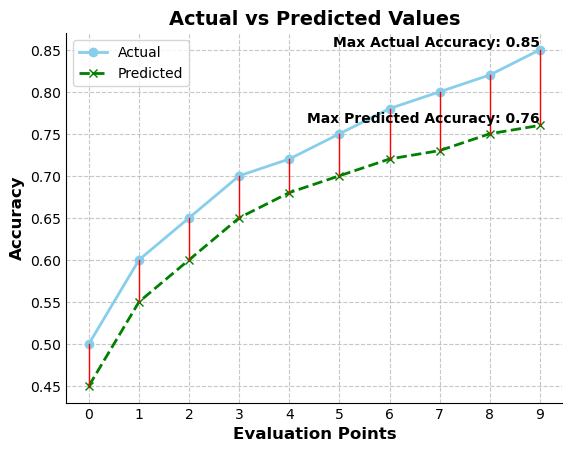

In [9]:
import matplotlib.pyplot as plt

actual_values = [0.5, 0.6, 0.65, 0.7, 0.72, 0.75, 0.78, 0.8, 0.82, 0.85]
predicted_values = [0.45, 0.55, 0.6, 0.65, 0.68, 0.7, 0.72, 0.73, 0.75, 0.76]

plt.plot(actual_values, label='Actual', marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.plot(predicted_values, label='Predicted', marker='x', color='green', linestyle='--', linewidth=2)

for i in range(len(actual_values)):
    plt.plot([i, i], [actual_values[i], predicted_values[i]], color='red', linestyle='-', linewidth=1)

plt.xlabel('Evaluation Points', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Actual vs Predicted Values', fontsize=14, fontweight='bold')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

max_actual_accuracy = max(actual_values)
plt.text(actual_values.index(max_actual_accuracy), max_actual_accuracy, f'Max Actual Accuracy: {max_actual_accuracy}', ha='right', va='bottom', fontsize=10, fontweight='bold')

max_predicted_accuracy = max(predicted_values)
plt.text(predicted_values.index(max_predicted_accuracy), max_predicted_accuracy, f'Max Predicted Accuracy: {max_predicted_accuracy}', ha='right', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(range(len(actual_values)), fontsize=10)
plt.yticks(fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)

plt.show()
